In [34]:
from sklearn.metrics import precision_recall_fscore_support, f1_score
from scipy.special import softmax
import numpy as np
import seaborn as sns
import pandas as pd


In [14]:
y_logits = np.array([[9.99987721e-01, 1.22325773e-05],
       [9.99987483e-01, 1.25022088e-05],
       [9.99985576e-02, 1.43847392e-05],
       [9.99988079e-01, 1.19345677e-03],
       [9.99987721e-01, 1.22700221e-04],
       [9.99987960e-03, 1.20601935e-06],
       [9.99987483e-03, 1.25022088e-02],
       [9.99987483e-01, 1.24922444e-01],
       [9.99985814e-01, 1.41448563e-03],
       [9.99985933e-04, 1.40302045e-05]])
y_probs = softmax(y_logits, axis=1)
y_true = np.array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])
y_probs

array([[0.73105376, 0.26894624],
       [0.73105366, 0.26894634],
       [0.52497524, 0.47502476],
       [0.73082152, 0.26917848],
       [0.73103204, 0.26896796],
       [0.50249965, 0.49750035],
       [0.49937442, 0.50062558],
       [0.70579853, 0.29420147],
       [0.73077759, 0.26922241],
       [0.50024649, 0.49975351]])

In [24]:
def assign_label(y_probs:np.array, cutoff:float):
    return np.where(y_probs[:,1] > cutoff, 1, 0)
cutoff = .5
assign_label(y_probs, cutoff)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [35]:
f1_list = []
cutoff_list = []
for cutoff in np.arange(0.005,1,0.005):
    y_pred = assign_label(y_probs, cutoff)
    f1_list.append(f1_score(y_pred=y_pred, y_true=y_true))
    cutoff_list.append(cutoff)
df = pd.DataFrame.from_dict({'f1':f1_list, 'cutoff':cutoff_list})
f1 = np.array(f1_list)
cutoff = np.array(cutoff_list)

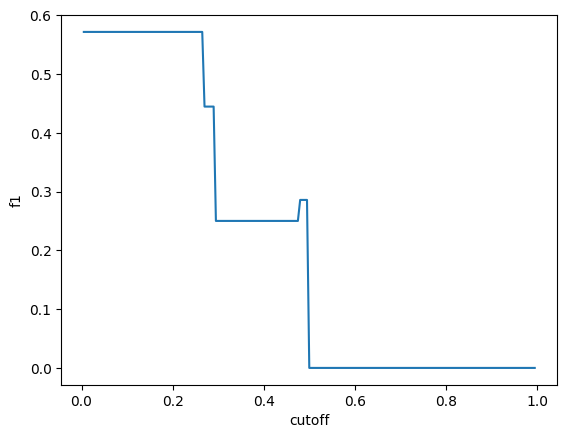

In [38]:
sns.lineplot(data=df, x="cutoff", y="f1")
print()

In [40]:
np.mean(f1), np.max(f1)

(0.21558187764217915, 0.5714285714285715)

In [2]:
import json
dct_arr = {'Name': 'John', 'Age': '23', 'Country': 'USA'}
print(json.dumps(dct_arr, sort_keys=False, indent=4))

{
    "Name": "John",
    "Age": "23",
    "Country": "USA"
}
